Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use **only** your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
import warnings
warnings.simplefilter('ignore')

# import personals
from env import deploy_explore
import wrangle as w

In [30]:
# deploys an explore.py file with some pre-built functions
deploy_explore()

In [31]:
# import data
train,validate,test = w.wrangle_zillow()

Reading from file...


In [32]:
w.df_info(train)

,nunique,dtypes,isnull,1036634
bedrooms,17,int64,0,2
bathrooms,37,float64,0,2.0
calculated_area,9210,int64,0,1502
salesamount,401250,int64,0,343939
yearbuilt,147,int64,0,1940
taxamount,637157,float64,0,4655.6
county,3,object,0,Los Angeles


In [33]:
write_contents = []

1. [x] Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

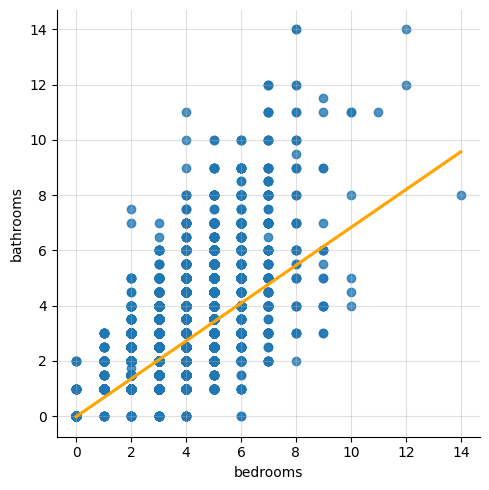

In [35]:
# plot 1 pairwise relationship
# sns.relplot(data=train,x='bedrooms',y='bathrooms')
sns.lmplot(data=train.sample(10**5),x='bedrooms',y='bathrooms',line_kws={'color':'orange'})
plt.grid(alpha=0.4)
plt.show()

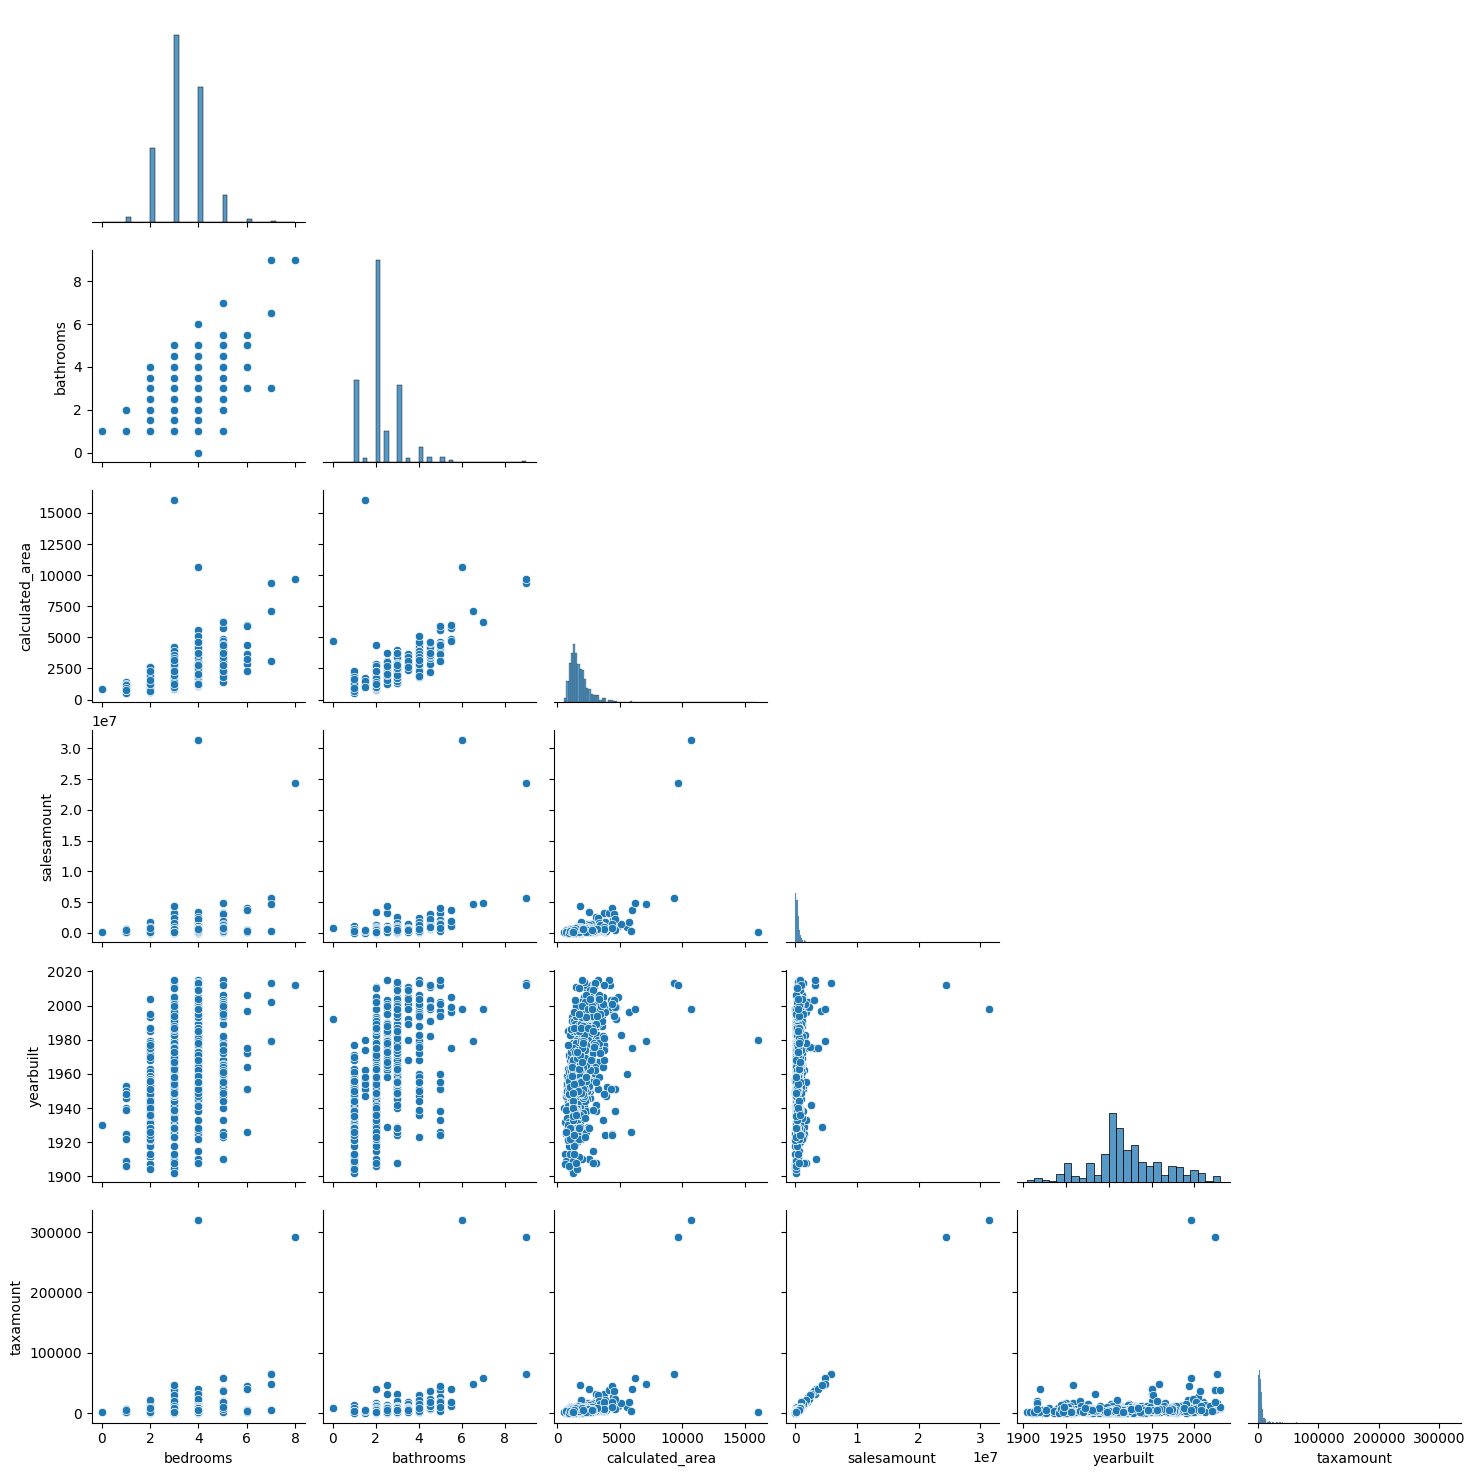

In [36]:
sns.pairplot(data=train.sample(1000),corner=True)
plt.show()

In [37]:
# get all the numerical columns
numeric_columns = [col for col in train.columns if train[col].dtype != 'O']
numeric_columns

['bedrooms',
 'bathrooms',
 'calculated_area',
 'salesamount',
 'yearbuilt',
 'taxamount']

In [38]:
# use itertools to get combinations
col_combos = list(itertools.combinations(numeric_columns,2))

In [39]:
len(col_combos)

15

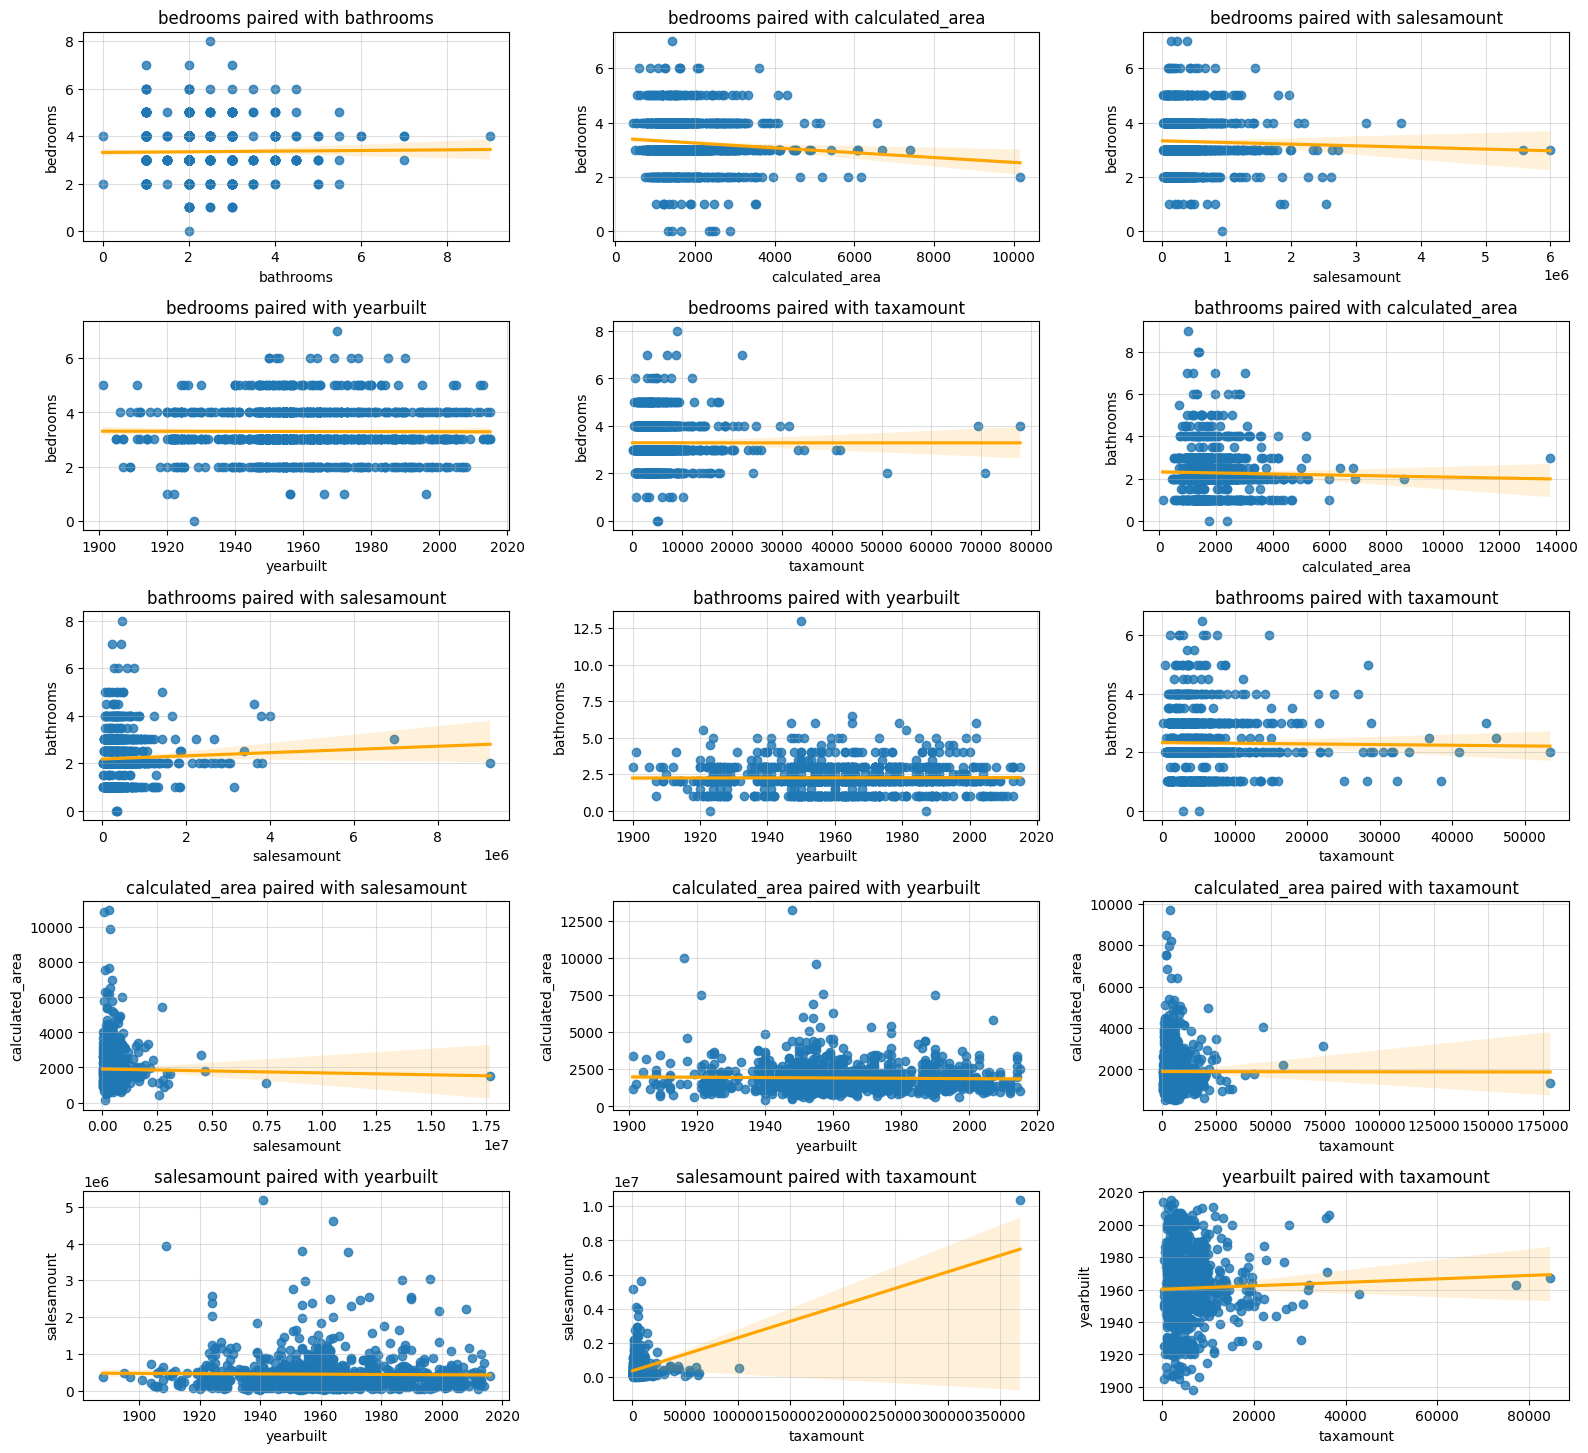

In [40]:
# plot each pairwise relationship in a for loop
# use subplots and enumerate
plt.figure(figsize=(16,20))
for i,cols in enumerate(col_combos):
    plot_number = i+1
    plt.subplot(7,3,plot_number)
    plt.title(f'{cols[0]} paired with {cols[1]}')
    sns.regplot(y=train[cols[0]].sample(10**3),x=train[cols[1]].sample(10**3),line_kws={'color':'orange'})
    plt.xlabel(cols[1])
    plt.ylabel(cols[0])
    plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()

In [41]:
def plot_variable_pairs(df):
    '''
    Takes the zillow DataFrame and plots all the pairwise relationships.
    
    Parameters:
    -----------
    df: DataFrame
        - the train DataFrame to be plotted
    
    Returns:
    --------
    None
    
    
    '''
    
    # get all the numerical columns
    numeric_columns = [col for col in train.columns if train[col].dtype != 'O']

    # use itertools to get combinations
    col_combos = list(itertools.combinations(numeric_columns,2))
    
    # plot each pairwise relationship in a for loop
    plt.figure(figsize=(16,20))
    for i,cols in enumerate(col_combos):
        plot_number = i+1
        plt.subplot(7,3,plot_number)
        plt.title(f'{cols[0]} paired with {cols[1]}')
        sns.regplot(y=df[cols[0]],x=df[cols[1]],line_kws={'color':'orange'})
        plt.xlabel(cols[1])
        plt.ylabel(cols[0])
        plt.grid(alpha=0.4)
    plt.tight_layout()

    plt.show()
    return None

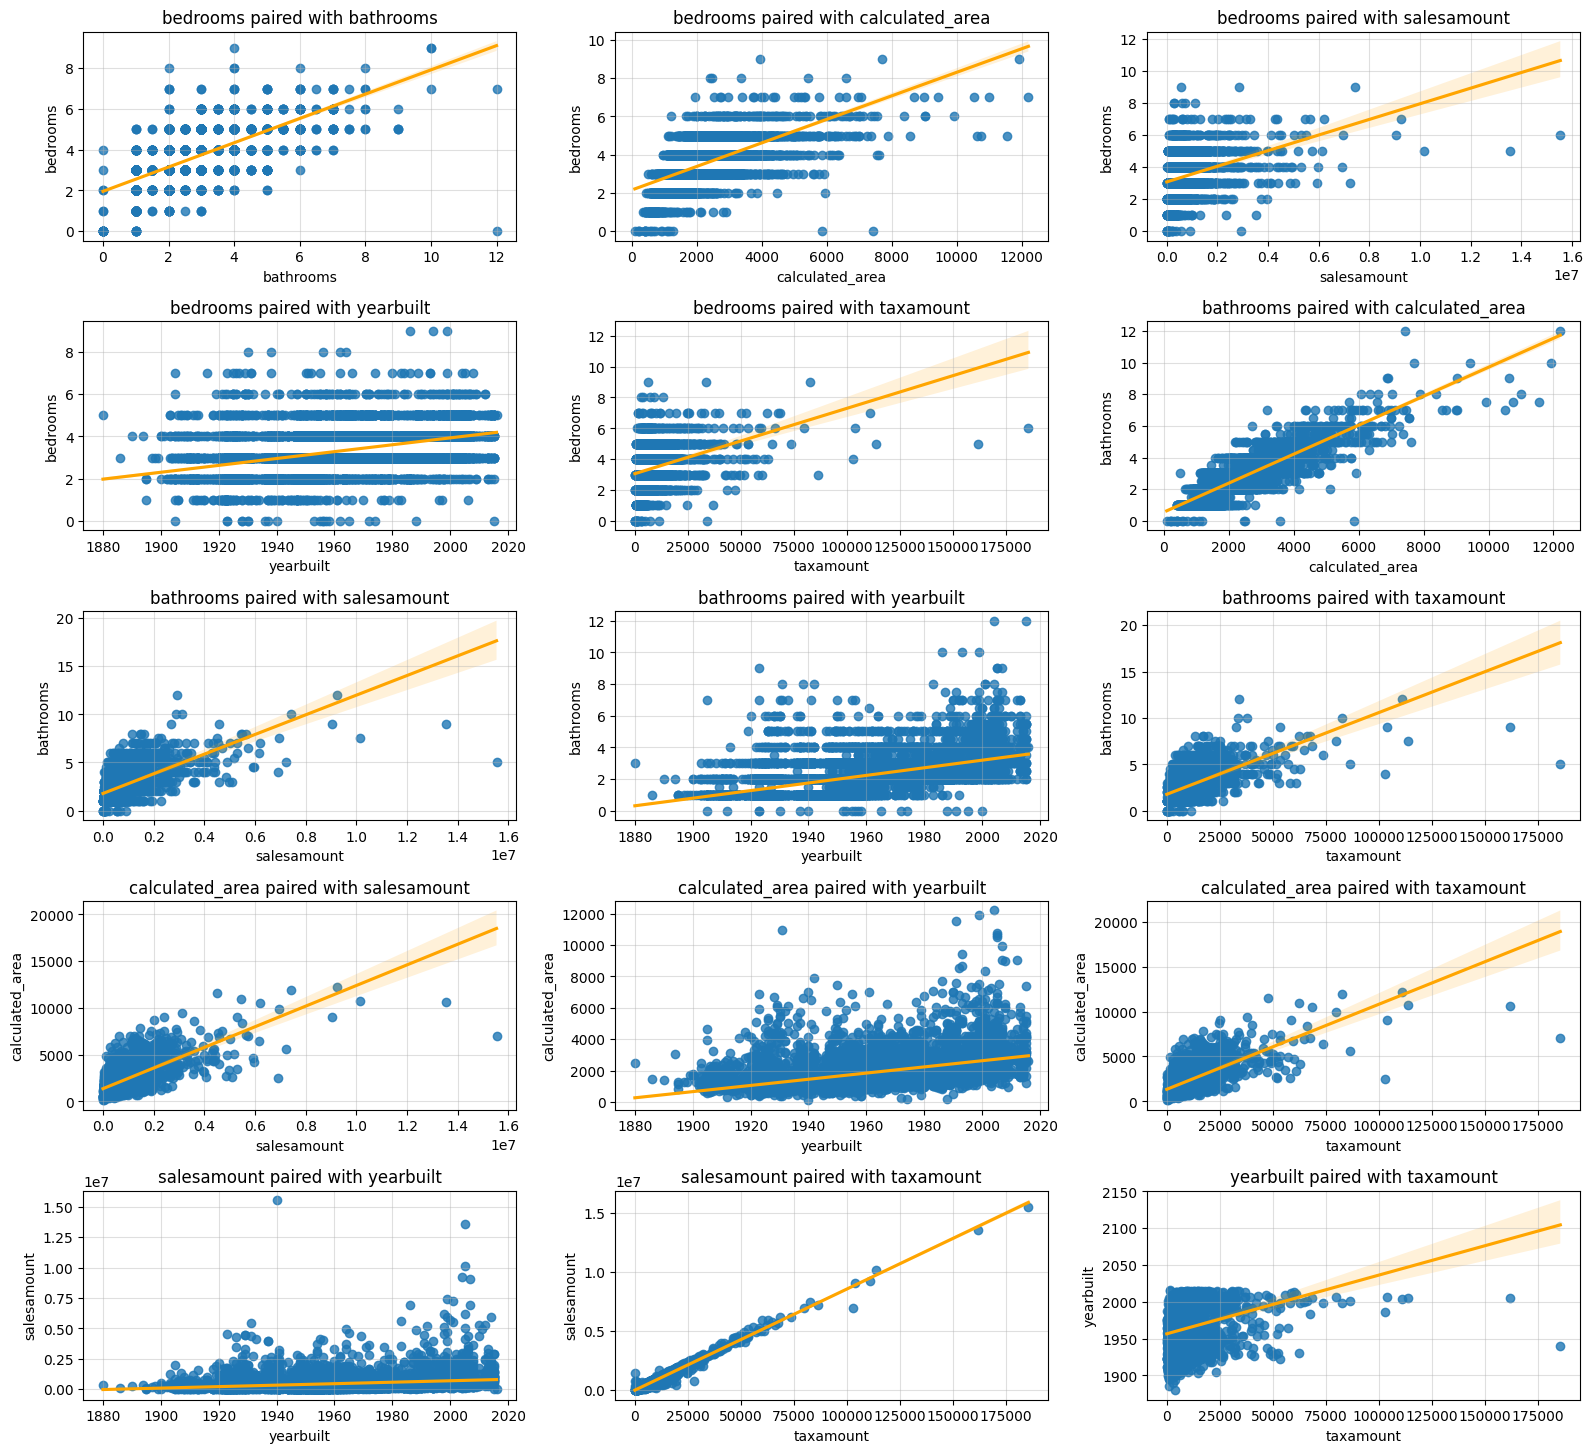

In [42]:
plot_variable_pairs(train.sample(10**4))

In [43]:
write_contents.append("""
def plot_variable_pairs(df):
    '''
    Takes the zillow DataFrame and plots all the pairwise relationships.
    
    Parameters:
    -----------
    df: DataFrame
        - the train DataFrame to be plotted
    
    Returns:
    --------
    None
    
    
    '''
    
    # get all the numerical columns
    numeric_columns = [col for col in df.columns if df[col].dtype != 'O']

    # use itertools to get combinations
    col_combos = list(itertools.combinations(numeric_columns,2))
    
    # plot each pairwise relationship in a for loop
    plt.figure(figsize=(16,20))
    for i,cols in enumerate(col_combos):
        plot_number = i+1
        plt.subplot(7,3,plot_number)
        plt.title(f'{cols[0]} paired with {cols[1]}')
        sns.regplot(y=df[cols[0]],x=df[cols[1]],line_kws={'color':'orange'})
        plt.xlabel(cols[1])
        plt.ylabel(cols[0])
        plt.grid(alpha=0.4)
    plt.tight_layout()

    plt.show()
    return None
""")

2. [x] Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [45]:
w.df_info(train)

,nunique,dtypes,isnull,1437581
bedrooms,17,int64,0,3
bathrooms,37,float64,0,2.0
calculated_area,9210,int64,0,1772
salesamount,401250,int64,0,629603
yearbuilt,147,int64,0,1950
taxamount,637157,float64,0,7580.11
county,3,object,0,Los Angeles


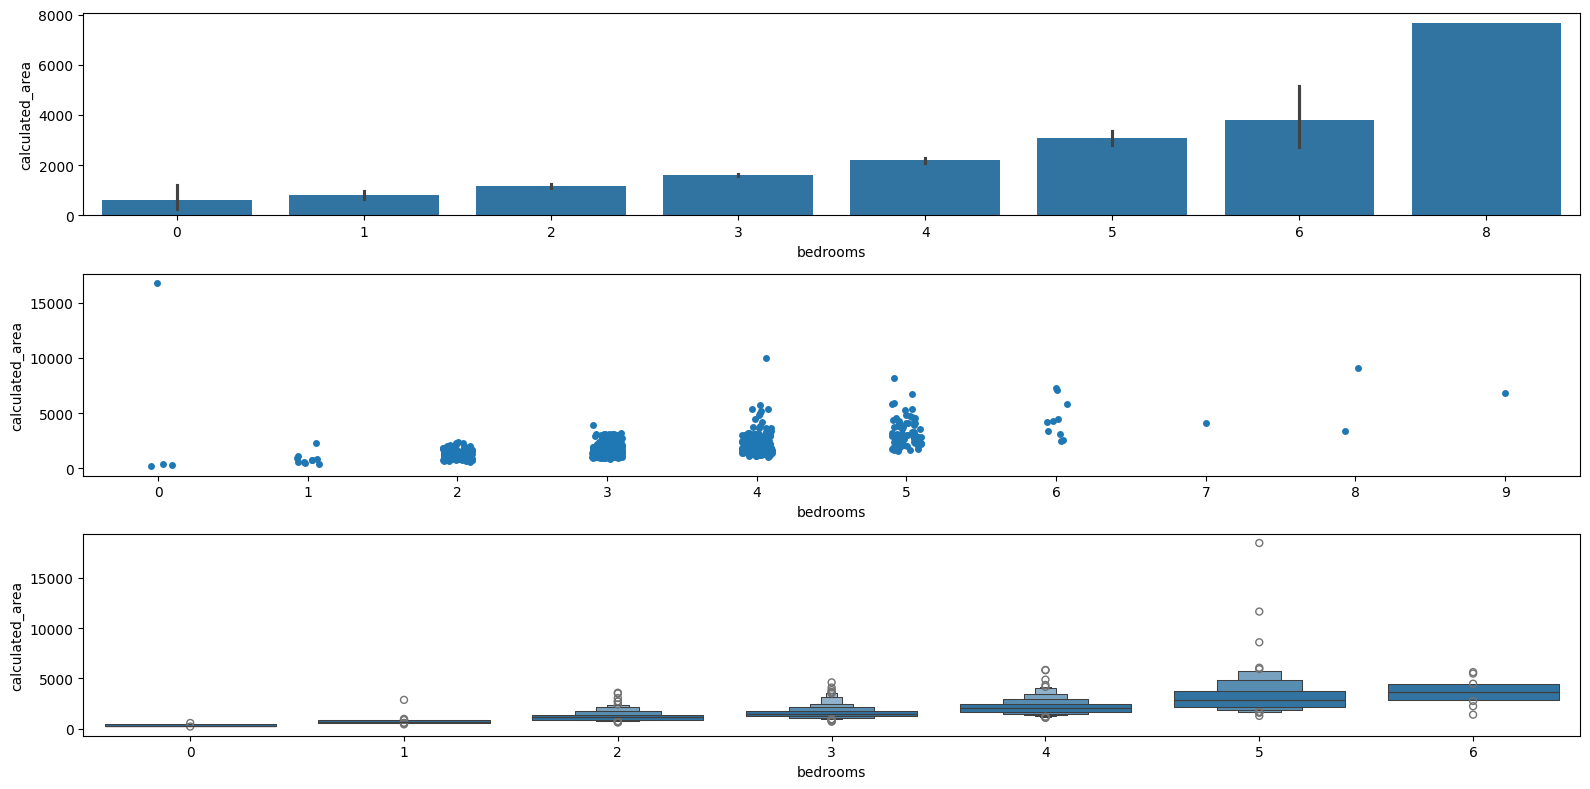

In [46]:
# plot 1 categorical against 1 continuous
cat_col = 'bedrooms'
con_col = 'calculated_area'
sample_size = 10**3

plt.figure(figsize=(16,8))
plt.subplot(3,1,1)
sns.barplot(data=train.sample(sample_size),x=cat_col,y=con_col)

plt.subplot(3,1,2)
sns.stripplot(data=train.sample(sample_size),x=cat_col,y=con_col)

plt.subplot(3,1,3)
sns.boxenplot(data=train.sample(sample_size),x=cat_col,y=con_col)

plt.tight_layout()
plt.show()

In [47]:
def plot_categorical_and_continuous_vars(df,cat_col,con_col):
    '''
    Plots a sample of the dataset with a barplot, strip plot, and boxenplot.
    
    Parameters:
    -----------
    df: DataFrame
        - A DataFrame to be plotted
    cat_col: str
        - The categorical column of the DataFrame to be plotted
    con_col: str
        - The continuous column of the DataFrame to be plotted
    sample_size: int, default=10**3
        - The size of the samples to be plotted
    
    
    '''
    
    plt.figure(figsize=(16,4))
    
    # plot first figure
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=cat_col,y=con_col,hue=cat_col)
    plt.grid(alpha=0.4)
    # plot second figure
    plt.subplot(1,3,2)
    sns.stripplot(data=df,x=cat_col,y=con_col,hue=cat_col)
    plt.grid(alpha=0.4)
    # plot third figure
    plt.subplot(1,3,3)
    sns.boxenplot(data=df,x=cat_col,y=con_col,hue=cat_col)
    plt.grid(alpha=0.4)

    plt.tight_layout()
    plt.show()
    return None

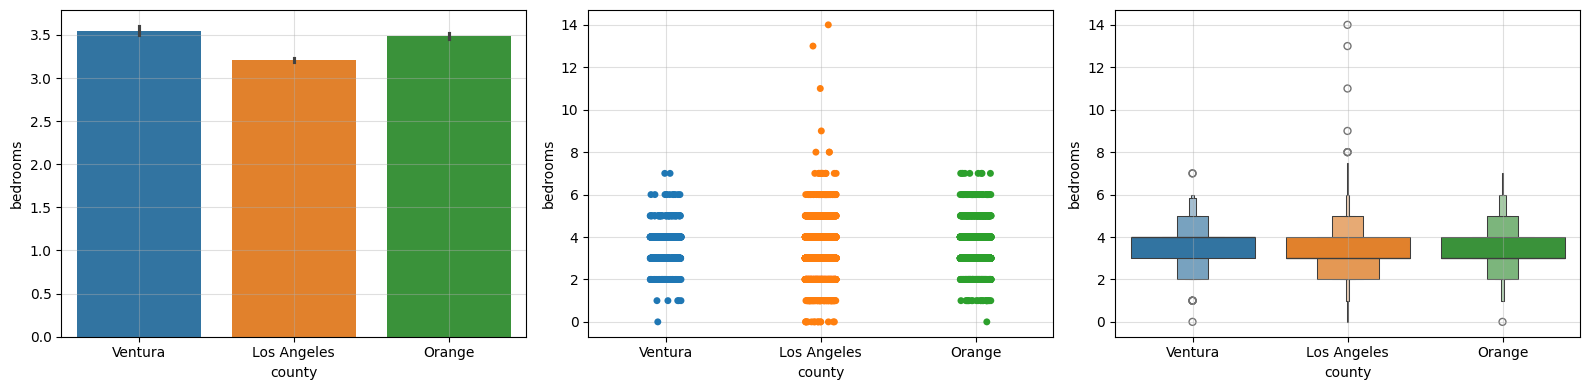

In [48]:
plot_categorical_and_continuous_vars(train.sample(10**4),'county','bedrooms')

In [49]:
write_contents.append("""
def plot_categorical_and_continuous_vars(df,cat_col,con_col):
    '''
    Plots a sample of the dataset with a barplot, strip plot, and boxenplot.
    
    Parameters:
    -----------
    df: DataFrame
        - A DataFrame to be plotted
    cat_col: str
        - The categorical column of the DataFrame to be plotted
    con_col: str
        - The continuous column of the DataFrame to be plotted
    sample_size: int, default=10**3
        - The size of the samples to be plotted
    
    
    '''
    
    plt.figure(figsize=(16,4))
    
    # plot first figure
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=cat_col,y=con_col,hue=cat_col)
    plt.grid(alpha=0.4)
    # plot second figure
    plt.subplot(1,3,2)
    sns.stripplot(data=df,x=cat_col,y=con_col,hue=cat_col)
    plt.grid(alpha=0.4)
    # plot third figure
    plt.subplot(1,3,3)
    sns.boxenplot(data=df,x=cat_col,y=con_col,hue=cat_col)
    plt.grid(alpha=0.4)

    plt.tight_layout()
    plt.show()
    return None
""")

3. [x] Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

In [51]:
with open('explore.py','a') as file:
    for content in write_contents:
        file.write(content + '\n')

4. [x] Use the functions you created above to explore your Zillow train dataset in your `explore.ipynb` notebook.

In [53]:
import explore as e

In [54]:
train.sample()

,bedrooms,bathrooms,calculated_area,salesamount,yearbuilt,taxamount,county
77840,4,2.0,2110,214217,1968,3348.66,Los Angeles


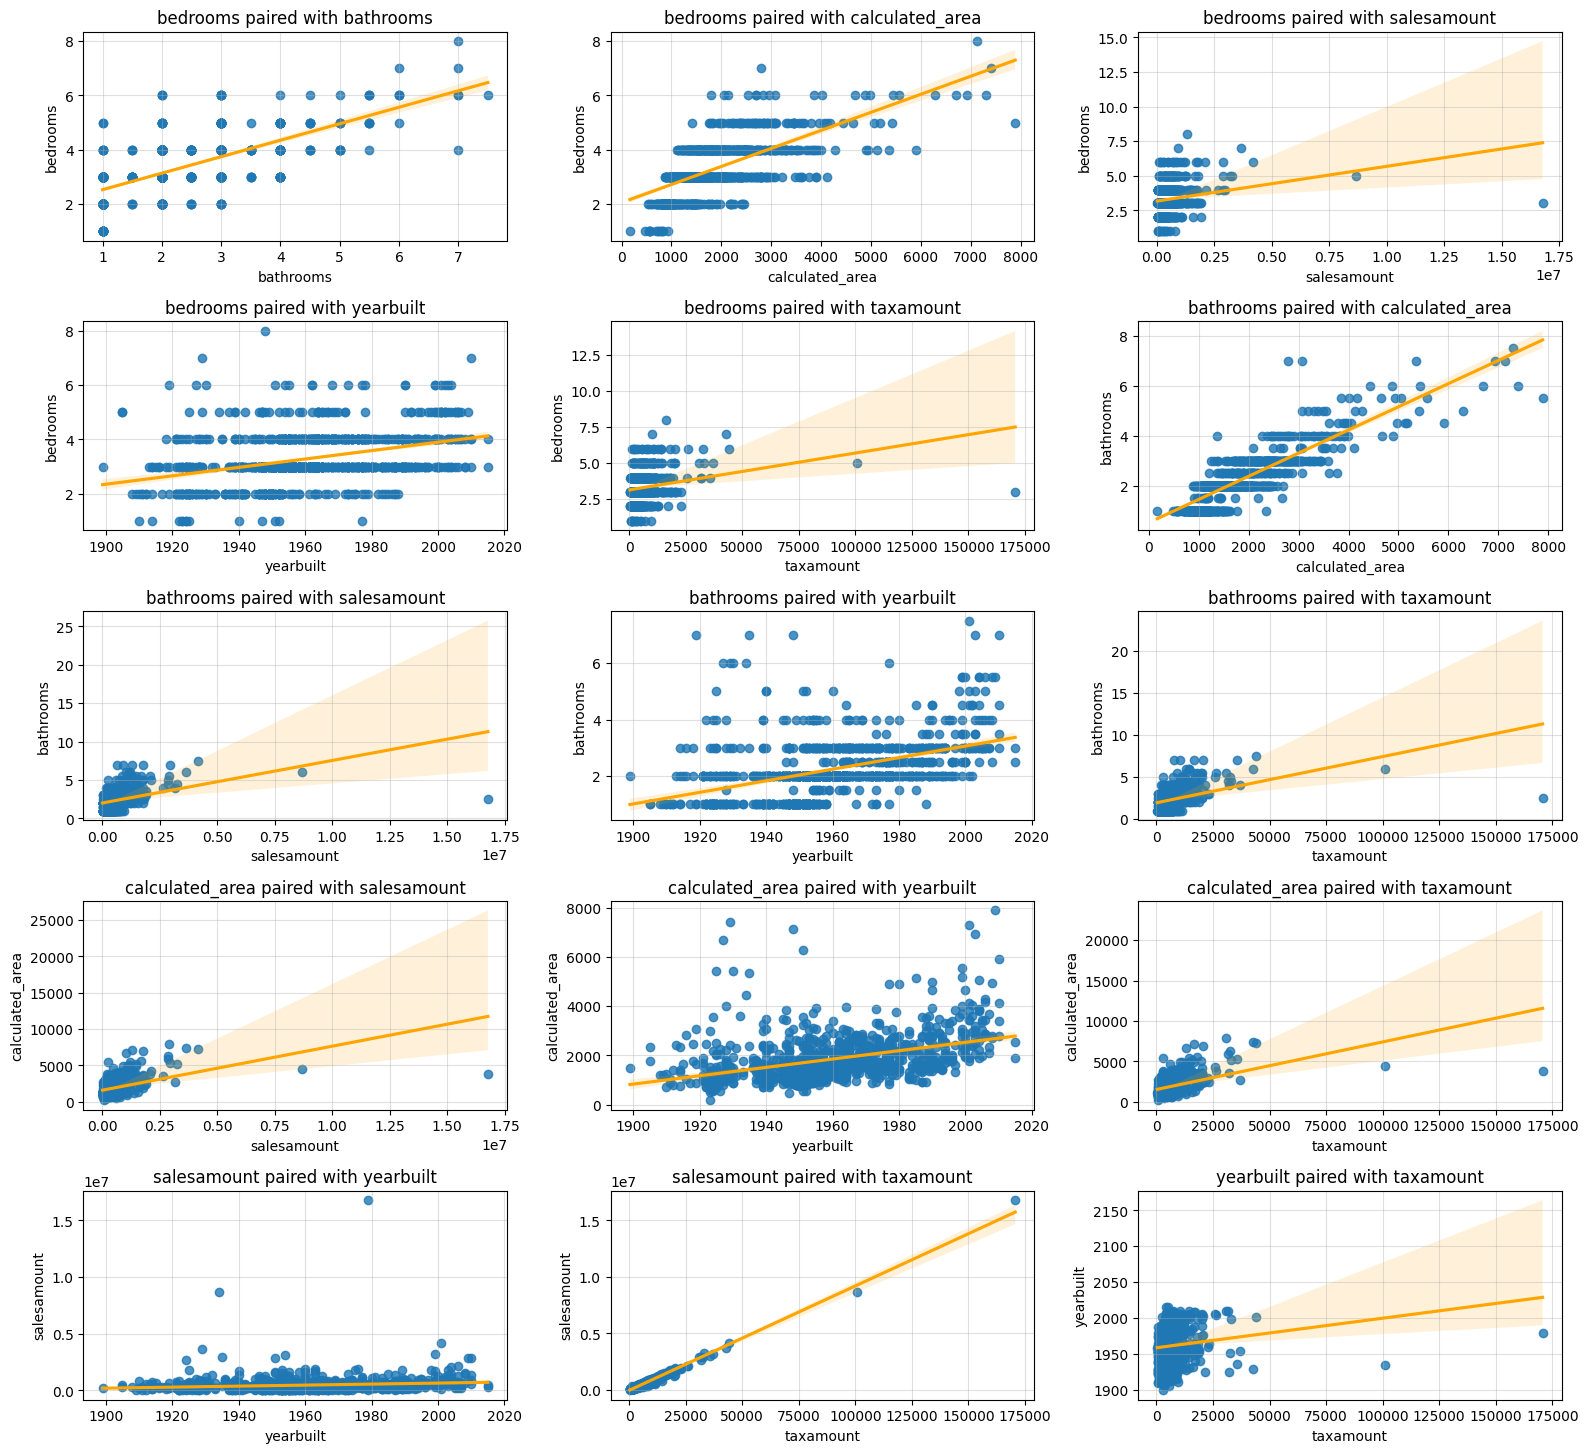

In [55]:
e.plot_variable_pairs(train.sample(10**3))

Observations:
- bedrooms when compared with the area and dollar amounts (sales and tax) tend to group lower on the x value (where bedrooms is the y)
- more bathrooms are built (or appear) in houses as years progress

In [57]:
w.df_info(train)

,nunique,dtypes,isnull,166937
bedrooms,17,int64,0,3
bathrooms,37,float64,0,1.0
calculated_area,9210,int64,0,1110
salesamount,401250,int64,0,238230
yearbuilt,147,int64,0,1950
taxamount,637157,float64,0,3306.73
county,3,object,0,Los Angeles


Continuous column: bedrooms


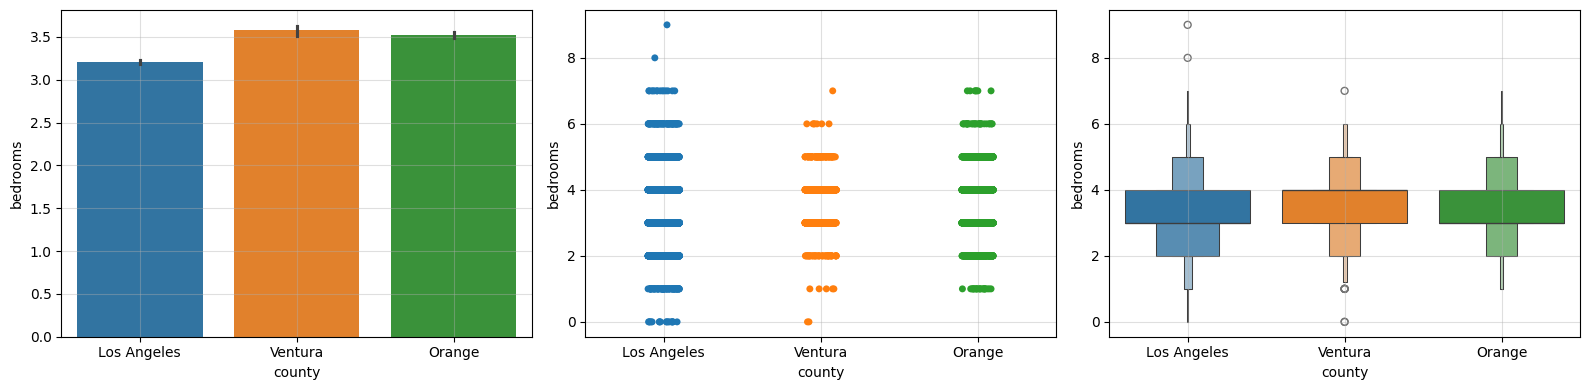

Continuous column: bathrooms


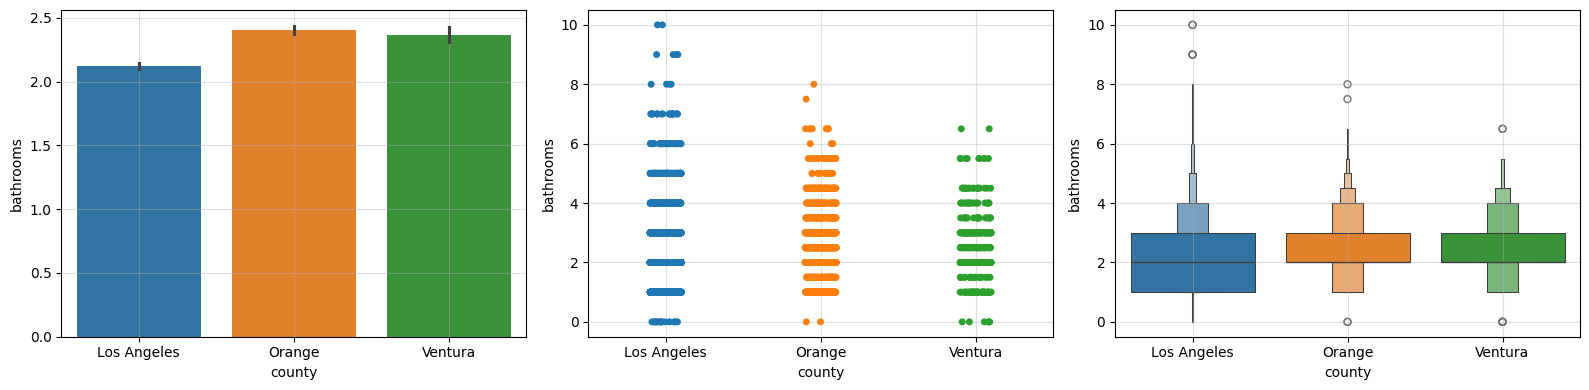

Continuous column: calculated_area


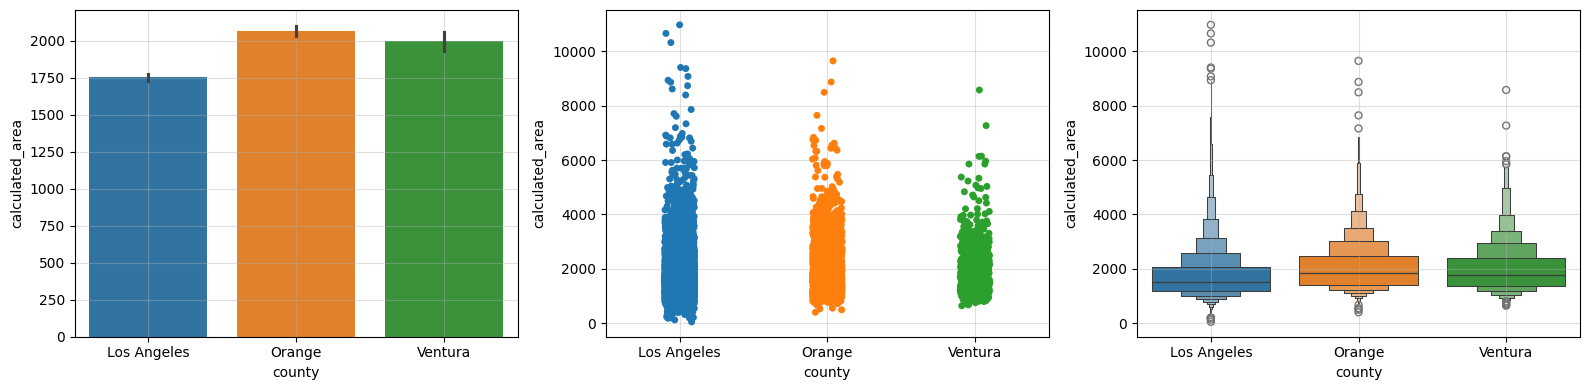

Continuous column: salesamount


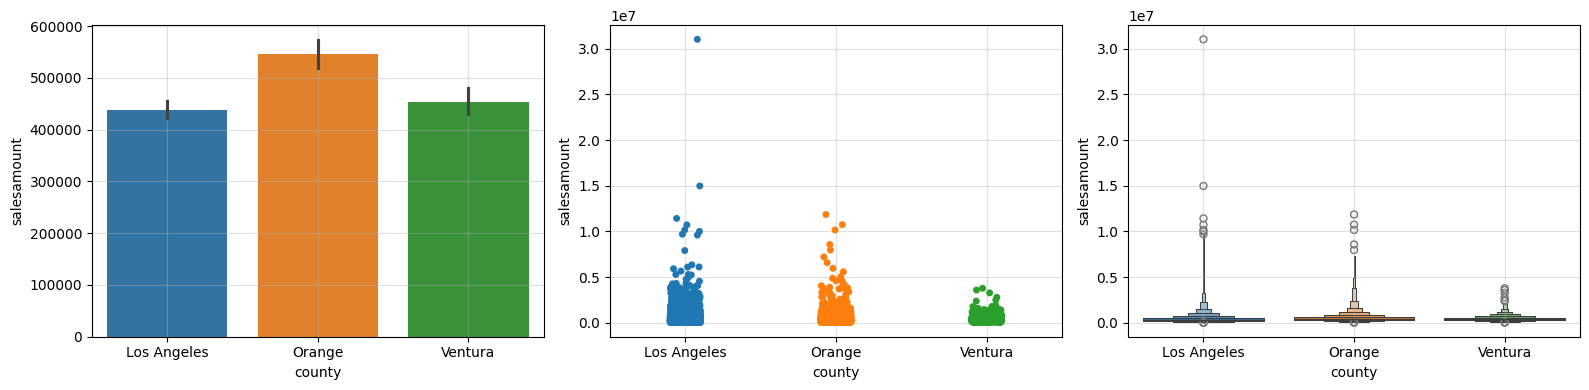

Continuous column: yearbuilt


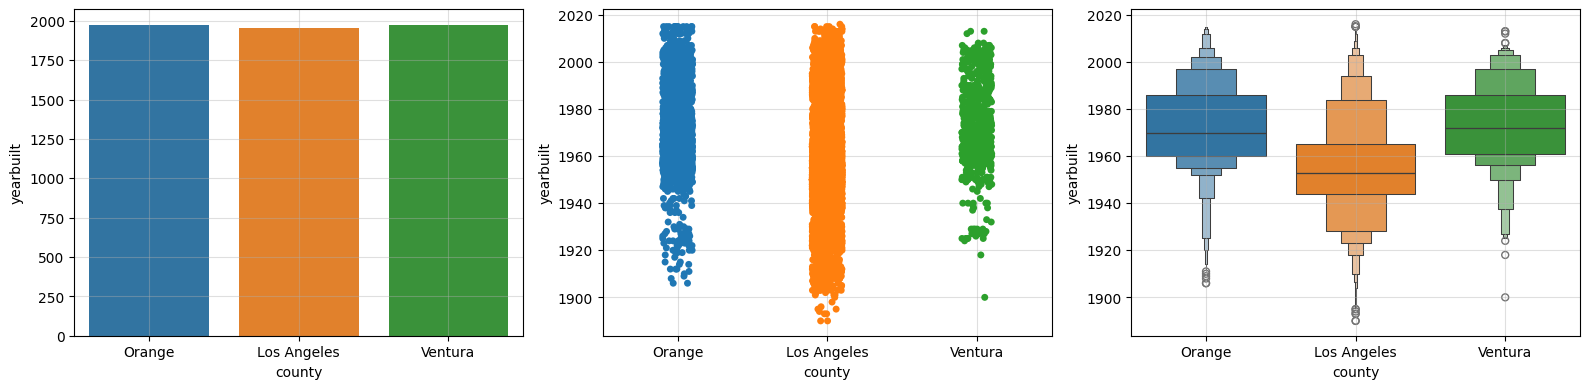

Continuous column: taxamount


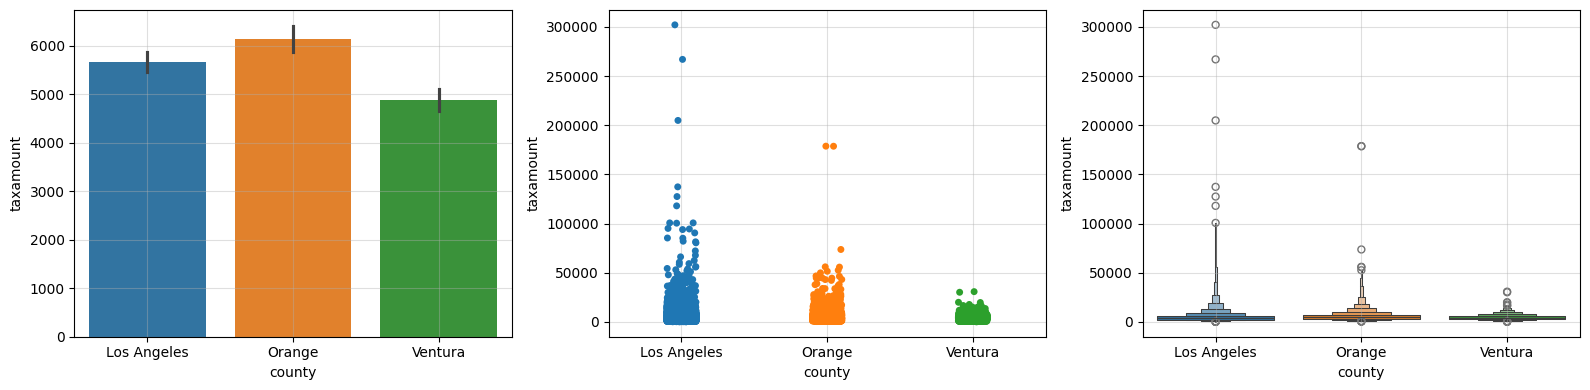

In [58]:
for col in numeric_columns:
    print(f'Continuous column: {col}')
    e.plot_categorical_and_continuous_vars(train.sample(10**4),'county',col)

5. [ ] Come up with some initial hypotheses based on your goal of predicting property value.
- There is a relationship between property value and county.
- 

In [60]:
stats.pearsonr(train.bedrooms,train.taxamount)

PearsonRResult(statistic=0.25698132426318787, pvalue=0.0)

6. [ ] Visualize all combinations of variables in some way.

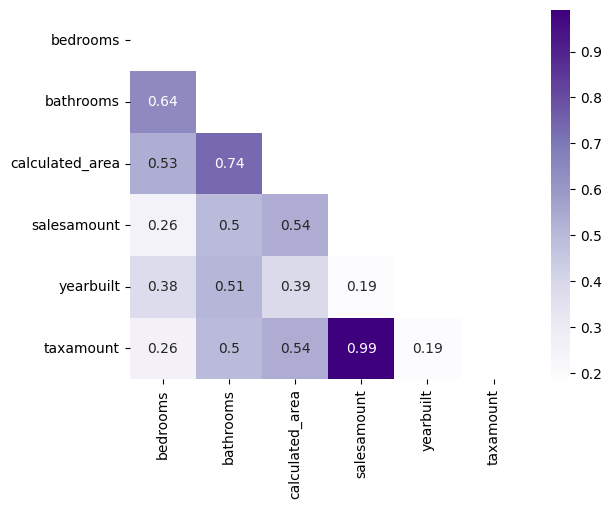

In [62]:
sns.heatmap(data=train.drop(columns='county').corr(),
            annot=True,
            mask=np.triu(train.drop(columns='county').corr()),
            cmap='Purples'
            )

plt.show()

7. [ ] Run the appropriate statistical tests where needed.

8. [ ] What independent variables are correlated with the dependent variable, home value?

9. [ ] Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

10. [ ] Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

11. [ ] Explore your dataset with any other visualizations you think will be helpful.


## Bonus Exercise

1. [ ] In a separate notebook called `explore_mall`, use the functions you have developed in this exercise with the `mall_customers` dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.